In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

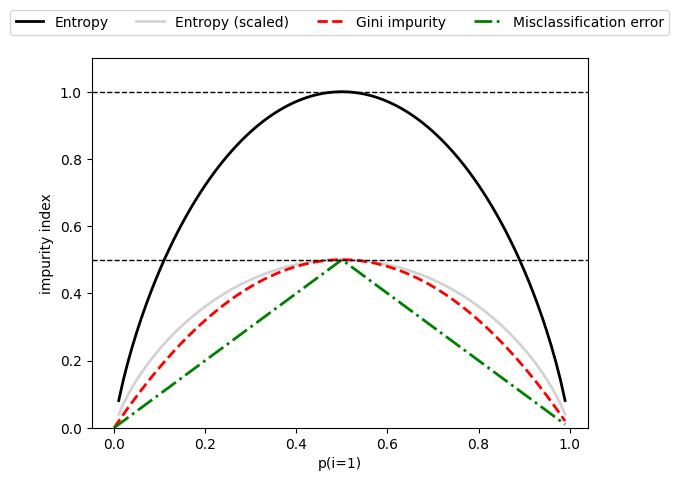

In [8]:
import matplotlib.pyplot as plt


def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])


x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip(
        [ent, sc_ent, gini(x), err],
        ['Entropy',
         'Entropy (scaled)',
         'Gini impurity',
         'Misclassification error'],
        ['-', '-', '--', '-.'],
        ['black', 'lightgray', 'red', 'green', 'cyan']
):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=5, fancybox=True, shadow=False
)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

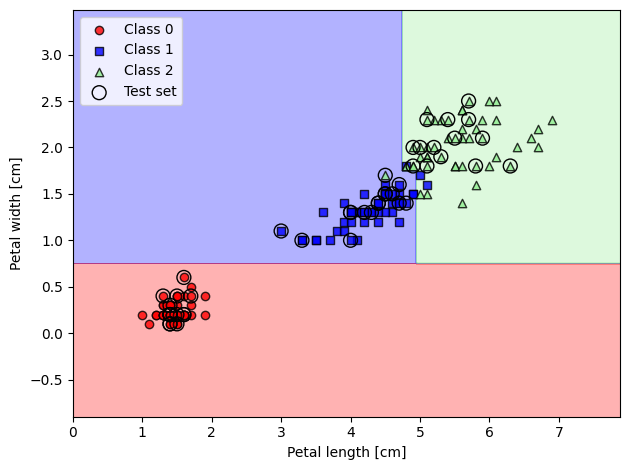

In [20]:
from sklearn.tree import DecisionTreeClassifier
from utils import plot_decision_regions

tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=1
)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X_combined,
    y_combined,
    classifier=tree_model,
    test_idx=range(105, 150)
)
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

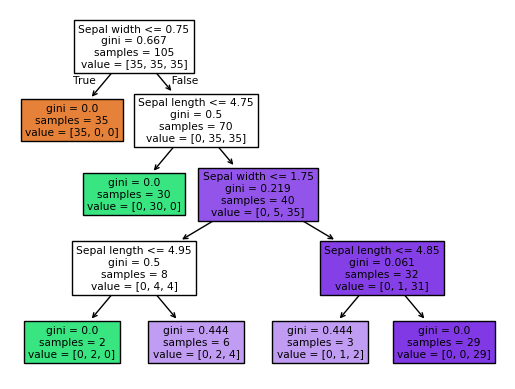

In [21]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']

tree.plot_tree(
    tree_model,
    feature_names=feature_names,
    filled=True
)
plt.show()

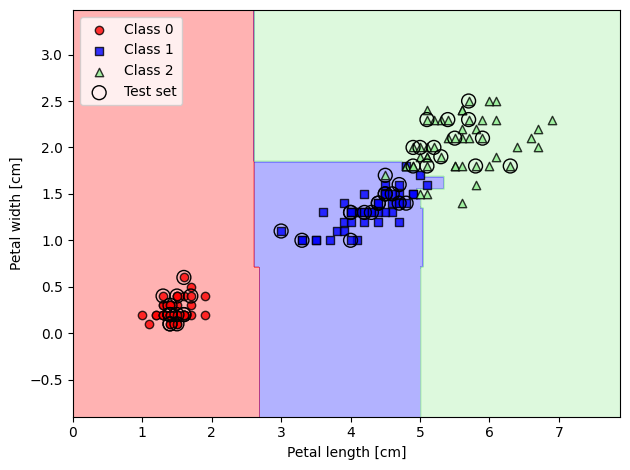

In [23]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators=25,
    random_state=1,
    n_jobs=2
)
forest.fit(X_train, y_train)

plot_decision_regions(
    X_combined,
    y_combined,
    classifier=forest,
    test_idx=range(105, 150)
)
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()